In [4]:
#import the packages
import pandas as pd
import numpy as np
from datetime import date
import yfinance as yf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import ta

In [13]:
today = date.today()
ticker1 = '^IXIC' 
start_date = '2024-09-01'
end = today
df = yf.download(ticker1, interval='5m', start=start_date)
df['RSI'] = ta.momentum.rsi(df.Close, window=14)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2024-09-03 09:30:00-04:00,17579.511719,17579.511719,17507.421875,17521.818359,17521.818359,0,NaN
2024-09-03 09:35:00-04:00,17498.417969,17519.875000,17486.851562,17500.390625,17500.390625,133153840,NaN
2024-09-03 09:40:00-04:00,17502.443359,17506.269531,17471.224609,17499.306641,17499.306641,121806969,NaN
2024-09-03 09:45:00-04:00,17496.685547,17521.640625,17486.546875,17521.109375,17521.109375,106785423,NaN
2024-09-03 09:50:00-04:00,17522.339844,17522.339844,17456.042969,17461.294922,17461.294922,93907287,NaN
...,...,...,...,...,...,...,...
2024-10-02 15:40:00-04:00,17950.462891,17961.132812,17941.906250,17958.289062,17958.289062,56370000,58.638449
2024-10-02 15:45:00-04:00,17958.175781,17965.302734,17957.939453,17963.125000,17963.125000,62000000,60.963855
2024-10-02 15:50:00-04:00,17961.816406,17961.816406,17939.550781,17943.667969,17943.667969,100739000,49.021960


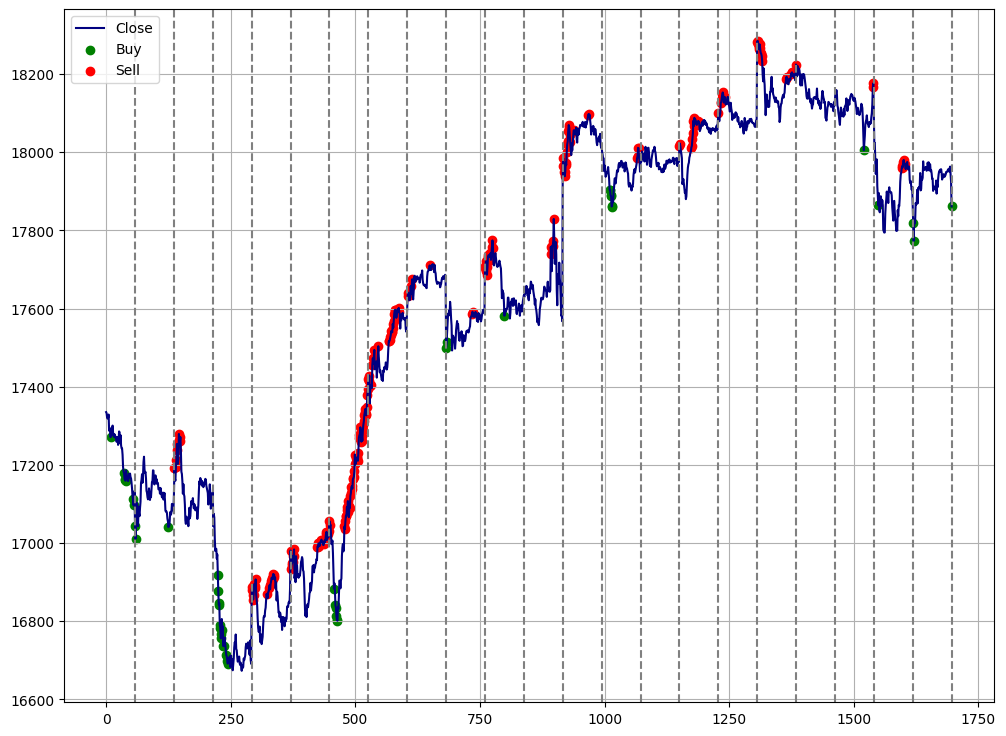

In [26]:
import pylab as pl
from matplotlib import collections  as mc

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,9

df1 = df.iloc[20:].copy()
#lista scatter buy
arrayRSI = []
for x in range(len(df1)):
    if df1.RSI[x] > 27:
        arrayRSI.append(np.nan)
    else:
        arrayRSI.append(df1.Close[x])

sellRSI = []
for x in range(len(df1)):
    if df1.RSI[x] < 65:
        sellRSI.append(np.nan)
    else:
        sellRSI.append(df1.Close[x])


XX = [x for x in range(len(df1))]
yt1 = [x for x in df1.Close]

pl.plot(XX, yt1, color = 'navy', label='Close')
pl.scatter(XX, arrayRSI, color = 'green', label='Buy')
pl.scatter(XX, sellRSI, color = 'red', label='Sell')

# Agregar líneas verticales cuando cambia el día
for i in range(1, len(df1)):
    if df1.index[i].date() != df1.index[i-1].date():
        pl.axvline(x=i, color='gray', linestyle='--')

pl.legend()
pl.grid(True)
pl.show();